# Домашнее задание №3

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [3]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

In [7]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

Number of variables,11
Number of observations,583
Total Missing (%),0.1%
Total size in memory,50.2 KiB
Average record size in memory,88.1 B
Numeric,9
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
# удаление строк с пустыми значениями
data2 = data.dropna()
data2.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [6]:
from sklearn.linear_model import LinearRegression
Direct_Bilirubin = data2['Direct_Bilirubin']
Total_Bilirubin = data2['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(Direct_Bilirubin).reshape(-1, 1), Total_Bilirubin)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.4263057597486348
slope: [1.93361341]


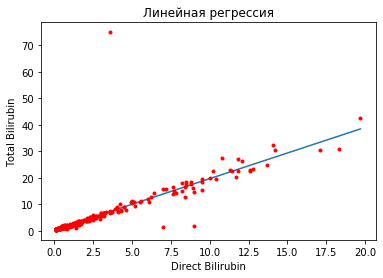

In [5]:
plt.xlabel('Direct Bilirubin')
plt.ylabel('Total Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(Direct_Bilirubin), max(Direct_Bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(Direct_Bilirubin, Total_Bilirubin, 'r.')
plt.show()

In [9]:
model.predict(np.array([4]).reshape(-1, 1)), model.predict(np.array([10]).reshape(-1, 1))
#похоже на правду

(array([8.16075942]), array([19.76243991]))

Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

C:\Users\Dmitry\Anaconda3\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


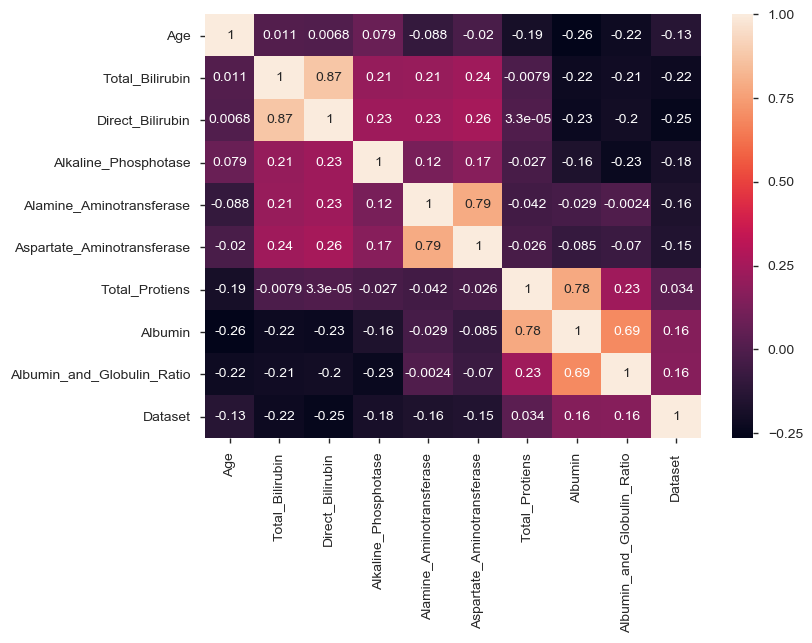

In [11]:
sns.heatmap(data2.corr(), annot = True)
plt.show()

In [7]:
# в качествевходных параметров выберем Albumin_and_Globulin_Ratio и Direct_Bilirubin
# так как у них нет сильной корреляции между собой, но при этом есть корреляция с dataset
Albumin_and_Globulin_Ratio = data2['Albumin_and_Globulin_Ratio']
Direct_Bilirubin = data2['Direct_Bilirubin']
Dataset = data2['Dataset']
x = np.vstack([np.array(Albumin_and_Globulin_Ratio), np.array(Direct_Bilirubin)]).T
y = np.array(Dataset)
model = LinearRegression().fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1.1795319843549186
slope: [ 0.16765337 -0.03569731]


In [8]:
print('Предсказание модели: ', model.predict(x[0:2]))
# в таблице значения Dataset = 1, мы получили значения, которые все же ближе к 1, чем к 2.

Предсказание модели:  [1.32685028 1.10726027]


Посчитать квартили для всех колонок. 

In [27]:
data2.quantile([0.25, 0.5, 0.75])

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0
0.75,58.0,2.6,1.3,298.0,61.0,87.0,7.2,3.8,1.10,2.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

C:\Users\Dmitry\Anaconda3\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


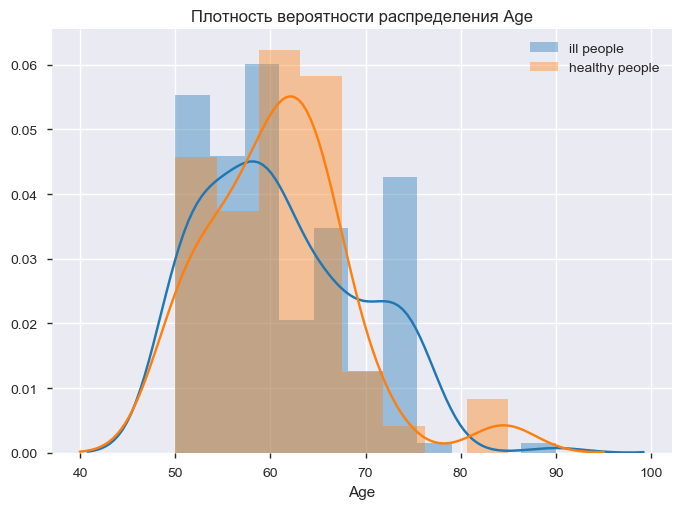

In [43]:
data_o50 = data2[data2['Age'] >= 50]
ill = data_o50[data_o50['Dataset'] == 1]['Age']
healthy = data_o50[data_o50['Dataset'] == 2]['Age']
sns.distplot(ill)
sns.distplot(healthy)
plt.title('Плотность вероятности распределения Age')
plt.legend(['ill people', 'healthy people'])
plt.show()
# после 70 больных становится намного больше, чем здоровых на интервале от 50 лет

C:\Users\Dmitry\Anaconda3\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


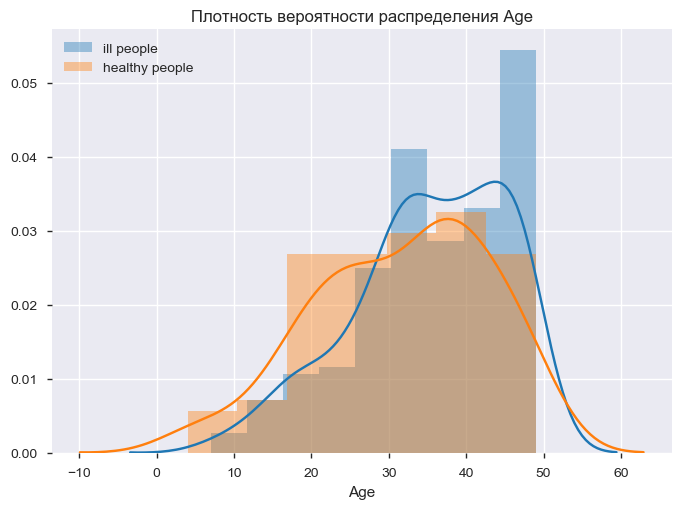

In [44]:
data_u50 = data2[data2['Age'] < 50]
ill = data_u50[data_u50['Dataset'] == 1]['Age']
healthy = data_u50[data_u50['Dataset'] == 2]['Age']
sns.distplot(ill)
sns.distplot(healthy)
plt.title('Плотность вероятности распределения Age')
plt.legend(['ill people', 'healthy people'])
plt.show()
# число больных людей увеличивается с возрастом на интервале до 50 лет

In [46]:
data_u50['Dataset'].mean(), data_o50['Dataset'].mean()
# до 50 лет здоровых немного больше

(1.3142857142857143, 1.240174672489083)

In [47]:
data_u50['Dataset'].quantile(0.5), data_o50['Dataset'].quantile(0.5)
# медианное значение одинаковое

(1.0, 1.0)

Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [9]:
ill_people = data2[data2['Dataset'] == 1]['Total_Bilirubin']
stats.ttest_1samp(ill_people, data2['Total_Bilirubin'].mean())
# p-value = 0.01, что меньше стандартной альфа-ошибке, равно 0.05. Это означает, что выборка больных людей не 
# похожа на генеральную совокупность.

Ttest_1sampResult(statistic=2.4588588880494733, pvalue=0.014347239706774866)

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [10]:
ill_people = data2[data2['Dataset'] == 1]['Total_Bilirubin']
healthy_people = data2[data2['Dataset'] == 2]['Total_Bilirubin']
stats.ttest_ind(ill_people, healthy_people)
# p-value намного меньше стандартной альфа-ошибки, данные сильно отличаются

Ttest_indResult(statistic=5.422946004172417, pvalue=8.632557516910643e-08)

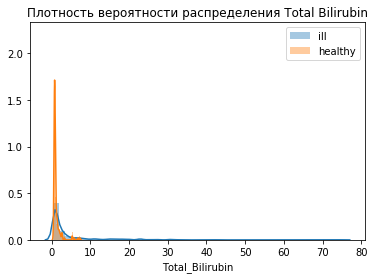

In [12]:
sns.distplot(ill_people)
sns.distplot(healthy_people)
plt.title('Плотность вероятности распределения Total Bilirubin')
plt.legend(['ill', 'healthy'])
plt.show()
# график подтверждает сильные различия между группами

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [22]:
u30 = data2[data2['Age'] <= 30]['Dataset']
u55 = data2[(data2['Age'] > 30) & (data2['Age'] <= 55)]['Dataset']
o55 = data2[data2['Age'] > 55]['Dataset']
stats.f_oneway(u30, u55, o55)
# p-value меньше стандартной альфа-ошибки, данные отличаются

F_onewayResult(statistic=8.508455766139265, pvalue=0.00022822150857116464)

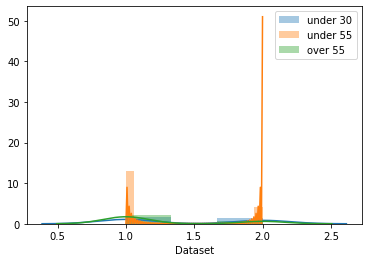

In [21]:
sns.distplot(u30)
sns.distplot(u55)
sns.distplot(o55)
plt.legend(['under 30', 'under 55', 'over 55'])
plt.show()